## Copy this notebook (if using Colab) via `File -> Save a Copy in Drive`.

## You can do this assignment outside of Colab (using your local Python installation) via `File -> Download`.

## <u>**Use the "Text" blocks to provide explanations wherever you find them necessary. Highlight your answers inside these text fields to ensure that we don't miss it while grading your HW.**</u>

## **Setup**

- Code to download the data directly from the colab notebook.
- If you find it easier to download the data from the kaggle website (and uploading it to your drive), you can skip this section.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# First mount your drive before running these cells.
# Create a folder for the this HW and change to that dir
%cd drive/MyDrive/CSE519

/content/drive/MyDrive/CSE519


# Download data from Kaggle

In [ ]:
#!pip install -q kaggle

In [ ]:
#from google.colab import files
# Create a new API token under "Account" in the kaggle webpage and download the json file
# Upload the file by clicking on the browse
#files.upload()

In [ ]:
#! mkdir ~/.kaggle

In [ ]:
#! cp kaggle.json ~/.kaggle/

In [ ]:
#!kaggle competitions download -c commonlit-evaluate-student-summaries

# Alternate: download data using gdown (if having issues with Kaggle)

In [ ]:
#!pip install gdown

In [ ]:
#import gdown
#url = 'https://drive.google.com/uc?id=164sQHZYvxU2XXPokrjzqv9MCGAMHaCIM'
#gdown.download(url)

# Extract data and install packages (regardless of data acquisition method)

In [ ]:
!unzip commonlit-evaluate-student-summaries.zip

Archive:  commonlit-evaluate-student-summaries.zip
replace prompts_test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
### TODO: Install required packages
### Student's code here
!pip install pandas
!pip install scikit-learn
!pip install numpy
!pip install matplotlib
!pip install seaborn
### END

## **Section 1: Library and Data Imports (Q1, 5 points)**

- Import your libraries and join the data from both `summaries_train.csv` and `prompts_train.csv` into a single dataframe with the same structure as `use_cols`. Print the head of the dataframe. **Do not modify `use_cols`.**

In [ ]:
### TODO: Load required packages
### Student's code here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
###

In [ ]:
use_cols = ["student_id",
            "prompt_id",
            "text",
            "content",
            "wording",
            "prompt_question",
            "prompt_title",
            "prompt_text"
           ]
dtypes = {
        'student_id':                                    'string',
        'prompt_id':                                     'string',
        'text':                                          'string',
        'content':                                       'Float64',
        'wording':                                       'Float64',
        'prompt_question':                               'string',
        'prompt_title':                                  'string',
        'prompt_text':                                   'string',
        }

In [ ]:
#Question 1:Load the summaries_train.csv and prompts_train.csv files, joined to replace the prompt_IDs with the relevant text fields into a dataframe. (5 points)

#reading the prompts and summaries training dataset
dtf1=pd.read_csv("prompts_train.csv")
dtf2=pd.read_csv("summaries_train.csv")
#merging the datasets to replace the prompt_IDs with the relevant text fields into a dataframe - merge_dtf
merge_dtf=pd.merge(dtf2,dtf1,on='prompt_id')
merge_dtf.astype(dtypes)
merge_dtf.head()



,student_id,prompt_id,text,content,wording,prompt_question,prompt_title,prompt_text
0,000e8c3c7ddb,814d6b,The third wave was an experimentto see how peo...,0.205683,0.380538,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave experiment took ...
1,0070c9e7af47,814d6b,The Third Wave developed rapidly because the ...,3.272894,3.219757,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave experiment took ...
2,0095993991fe,814d6b,The third wave only started as an experiment w...,0.205683,0.380538,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave experiment took ...
3,00c20c6ddd23,814d6b,The experimen was orginally about how even whe...,0.567975,0.969062,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave experiment took ...
4,00d40ad10dc9,814d6b,The third wave developed so quickly due to the...,-0.910596,-0.081769,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave experiment took ...


## **Section 2: Features (Q2 and Q3, 25 points total)**

In [ ]:
# Question 2: Construct a table of five features (really 7) from the text for each instance: (10 points)
# 1)- Number of words in student response (text) and prompt (prompt_text)

#a.)This is for counting the number of words in student response(text) named as word_count
merge_dtf['word_count'] = merge_dtf['text'].apply(lambda x: len(str(x).split()))
merge_dtf.head()


,student_id,prompt_id,text,content,wording,prompt_question,prompt_title,prompt_text,word_count
0,000e8c3c7ddb,814d6b,The third wave was an experimentto see how peo...,0.205683,0.380538,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave experiment took ...,61
1,0070c9e7af47,814d6b,The Third Wave developed rapidly because the ...,3.272894,3.219757,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave experiment took ...,203
2,0095993991fe,814d6b,The third wave only started as an experiment w...,0.205683,0.380538,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave experiment took ...,60
3,00c20c6ddd23,814d6b,The experimen was orginally about how even whe...,0.567975,0.969062,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave experiment took ...,76
4,00d40ad10dc9,814d6b,The third wave developed so quickly due to the...,-0.910596,-0.081769,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave experiment took ...,27


In [ ]:
# 1)- b.) This is for counting the number of words in prompt(prompt_text) named as word_count_prompt
merge_dtf['word_count_prompt'] = merge_dtf['prompt_text'].apply(lambda x: len(str(x).split()))
merge_dtf.head()

,student_id,prompt_id,text,content,wording,prompt_question,prompt_title,prompt_text,word_count,word_count_prompt
0,000e8c3c7ddb,814d6b,The third wave was an experimentto see how peo...,0.205683,0.380538,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave experiment took ...,61,596
1,0070c9e7af47,814d6b,The Third Wave developed rapidly because the ...,3.272894,3.219757,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave experiment took ...,203,596
2,0095993991fe,814d6b,The third wave only started as an experiment w...,0.205683,0.380538,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave experiment took ...,60,596
3,00c20c6ddd23,814d6b,The experimen was orginally about how even whe...,0.567975,0.969062,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave experiment took ...,76,596
4,00d40ad10dc9,814d6b,The third wave developed so quickly due to the...,-0.910596,-0.081769,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave experiment took ...,27,596


In [ ]:
# 2) Number of distinct words in student response (text) and prompt (prompt_text)

# a.) This is for counting the number of distinct words in student response(text) named as word_distinct
merge_dtf['word_distinct'] = merge_dtf['text'].apply(lambda x: len(set(str(x).split())))

merge_dtf.head()

,student_id,prompt_id,text,content,wording,prompt_question,prompt_title,prompt_text,word_count,word_count_prompt,word_distinct
0,000e8c3c7ddb,814d6b,The third wave was an experimentto see how peo...,0.205683,0.380538,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave experiment took ...,61,596,51
1,0070c9e7af47,814d6b,The Third Wave developed rapidly because the ...,3.272894,3.219757,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave experiment took ...,203,596,138
2,0095993991fe,814d6b,The third wave only started as an experiment w...,0.205683,0.380538,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave experiment took ...,60,596,50
3,00c20c6ddd23,814d6b,The experimen was orginally about how even whe...,0.567975,0.969062,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave experiment took ...,76,596,59
4,00d40ad10dc9,814d6b,The third wave developed so quickly due to the...,-0.910596,-0.081769,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave experiment took ...,27,596,25


In [ ]:
# 2) b.) This is for counting the number of distinct words in prompt(prompt_text) named as word_distinct2
merge_dtf['word_distinct2'] = merge_dtf['prompt_text'].apply(lambda x: len(set(str(x).split())))

merge_dtf.head()

,student_id,prompt_id,text,content,wording,prompt_question,prompt_title,prompt_text,word_count,word_count_prompt,word_distinct,word_distinct2
0,000e8c3c7ddb,814d6b,The third wave was an experimentto see how peo...,0.205683,0.380538,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave experiment took ...,61,596,51,300
1,0070c9e7af47,814d6b,The Third Wave developed rapidly because the ...,3.272894,3.219757,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave experiment took ...,203,596,138,300
2,0095993991fe,814d6b,The third wave only started as an experiment w...,0.205683,0.380538,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave experiment took ...,60,596,50,300
3,00c20c6ddd23,814d6b,The experimen was orginally about how even whe...,0.567975,0.969062,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave experiment took ...,76,596,59,300
4,00d40ad10dc9,814d6b,The third wave developed so quickly due to the...,-0.910596,-0.081769,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave experiment took ...,27,596,25,300


In [ ]:
# 3) Number of words common to student response (text) and prompt (prompt_text)

# This is for counting the number of common or similar words in student response(text) and prompt(prompt_text) named as word_common
def word_common(text, prompt_text):
    wordset1 = set(text.split())
    wordset2 = set(prompt_text.split())
    word_common=wordset1.intersection(wordset2)
    return len(word_common)
merge_dtf['word_common'] = merge_dtf.apply(lambda row: word_common(row['text'], row['prompt_text']), axis=1)
merge_dtf.head()







,student_id,prompt_id,text,content,wording,prompt_question,prompt_title,prompt_text,word_count,word_count_prompt,word_distinct,word_distinct2,word_common
0,000e8c3c7ddb,814d6b,The third wave was an experimentto see how peo...,0.205683,0.380538,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave experiment took ...,61,596,51,300,21
1,0070c9e7af47,814d6b,The Third Wave developed rapidly because the ...,3.272894,3.219757,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave experiment took ...,203,596,138,300,46
2,0095993991fe,814d6b,The third wave only started as an experiment w...,0.205683,0.380538,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave experiment took ...,60,596,50,300,29
3,00c20c6ddd23,814d6b,The experimen was orginally about how even whe...,0.567975,0.969062,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave experiment took ...,76,596,59,300,36
4,00d40ad10dc9,814d6b,The third wave developed so quickly due to the...,-0.910596,-0.081769,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave experiment took ...,27,596,25,300,15


In [ ]:
# 4) Number of words common to student response (text) and prompt_question

# This is for counting the number of common or similar words in student response(text) and prompt questions(prompt_question) named as word_common2
def word_common2(text, prompt_question):
    wordset1 = set(text.split())
    wordset2 = set(prompt_question.split())
    word_common2=wordset1.intersection(wordset2)
    return len(word_common2)
merge_dtf['word_common2'] = merge_dtf.apply(lambda row: word_common2(row['text'], row['prompt_question']), axis=1)
merge_dtf.head()

,student_id,prompt_id,text,content,wording,prompt_question,prompt_title,prompt_text,word_count,word_count_prompt,word_distinct,word_distinct2,word_common,word_common2
0,000e8c3c7ddb,814d6b,The third wave was an experimentto see how peo...,0.205683,0.380538,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave experiment took ...,61,596,51,300,21,5
1,0070c9e7af47,814d6b,The Third Wave developed rapidly because the ...,3.272894,3.219757,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave experiment took ...,203,596,138,300,46,9
2,0095993991fe,814d6b,The third wave only started as an experiment w...,0.205683,0.380538,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave experiment took ...,60,596,50,300,29,5
3,00c20c6ddd23,814d6b,The experimen was orginally about how even whe...,0.567975,0.969062,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave experiment took ...,76,596,59,300,36,7
4,00d40ad10dc9,814d6b,The third wave developed so quickly due to the...,-0.910596,-0.081769,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave experiment took ...,27,596,25,300,15,5


In [ ]:
# 5) Number of words common to student response (text) and prompt_title

# This is for counting the number of common or similar words in student response(text) and title of the prompt(prompt_title) named as word_common3
def word_common3(text, prompt_title):
    wordset1 = set(text.split())
    wordset2 = set(prompt_title.split())
    word_common3=wordset1.intersection(wordset2)
    return len(word_common3)
merge_dtf['word_common3'] = merge_dtf.apply(lambda row: word_common3(row['text'], row['prompt_title']), axis=1)
merge_dtf.head()

,student_id,prompt_id,text,content,wording,prompt_question,prompt_title,prompt_text,word_count,word_count_prompt,word_distinct,word_distinct2,word_common,word_common2,word_common3
0,000e8c3c7ddb,814d6b,The third wave was an experimentto see how peo...,0.205683,0.380538,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave experiment took ...,61,596,51,300,21,5,1
1,0070c9e7af47,814d6b,The Third Wave developed rapidly because the ...,3.272894,3.219757,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave experiment took ...,203,596,138,300,46,9,3
2,0095993991fe,814d6b,The third wave only started as an experiment w...,0.205683,0.380538,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave experiment took ...,60,596,50,300,29,5,1
3,00c20c6ddd23,814d6b,The experimen was orginally about how even whe...,0.567975,0.969062,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave experiment took ...,76,596,59,300,36,7,1
4,00d40ad10dc9,814d6b,The third wave developed so quickly due to the...,-0.910596,-0.081769,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave experiment took ...,27,596,25,300,15,5,1


In [ ]:
# Question-3: Now fortify this list with at least five other numerical features.  Consider readability indices, counts of words from particular classes (e.g character length, part of speech, popularity).  Use your imagination as to what might be helpful for identifying well written summaries of texts. (15 points)

# Here I have added Six more features of my own.
# 1st feature: average word length i.e. finding the average length of words in student response and naming it as average word length
import nltk
wordlists = merge_dtf['text'].apply(lambda x: x.split())
sumlength = wordlists.apply(lambda wordlists: sum(len(word) for word in wordlists))
wordstotal = wordlists.apply(len)
avgwordlength = sumlength / wordstotal
merge_dtf['average word length'] = avgwordlength
merge_dtf.head()


,student_id,prompt_id,text,content,wording,prompt_question,prompt_title,prompt_text,word_count,word_count_prompt,word_distinct,word_distinct2,word_common,word_common2,word_common3,average word length
0,000e8c3c7ddb,814d6b,The third wave was an experimentto see how peo...,0.205683,0.380538,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave experiment took ...,61,596,51,300,21,5,1,4.688525
1,0070c9e7af47,814d6b,The Third Wave developed rapidly because the ...,3.272894,3.219757,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave experiment took ...,203,596,138,300,46,9,3,5.024631
2,0095993991fe,814d6b,The third wave only started as an experiment w...,0.205683,0.380538,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave experiment took ...,60,596,50,300,29,5,1,4.766667
3,00c20c6ddd23,814d6b,The experimen was orginally about how even whe...,0.567975,0.969062,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave experiment took ...,76,596,59,300,36,7,1,4.947368
4,00d40ad10dc9,814d6b,The third wave developed so quickly due to the...,-0.910596,-0.081769,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave experiment took ...,27,596,25,300,15,5,1,4.407407


In [ ]:
#2nd feature: stopword count i.e. counting the number of stopwords present in student response and naming it as stopword_count
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('punkt')
from nltk.tokenize import word_tokenize

def count_stopwords(text):
    words = word_tokenize(text)
    stopwords_present = set(stopwords.words('english'))
    stopwordcounttotal = sum(1 for word in words if word.lower() in stopwords_present)
    return stopwordcounttotal
merge_dtf['stopword_count'] = merge_dtf['text'].apply(count_stopwords)
merge_dtf.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,student_id,prompt_id,text,content,wording,prompt_question,prompt_title,prompt_text,word_count,word_count_prompt,word_distinct,word_distinct2,word_common,word_common2,word_common3,average word length,stopword_count
0,000e8c3c7ddb,814d6b,The third wave was an experimentto see how peo...,0.205683,0.380538,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave experiment took ...,61,596,51,300,21,5,1,4.688525,25
1,0070c9e7af47,814d6b,The Third Wave developed rapidly because the ...,3.272894,3.219757,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave experiment took ...,203,596,138,300,46,9,3,5.024631,94
2,0095993991fe,814d6b,The third wave only started as an experiment w...,0.205683,0.380538,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave experiment took ...,60,596,50,300,29,5,1,4.766667,28
3,00c20c6ddd23,814d6b,The experimen was orginally about how even whe...,0.567975,0.969062,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave experiment took ...,76,596,59,300,36,7,1,4.947368,38
4,00d40ad10dc9,814d6b,The third wave developed so quickly due to the...,-0.910596,-0.081769,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave experiment took ...,27,596,25,300,15,5,1,4.407407,12


In [ ]:
#3rd Feature: Calculating the number of punctuations used in student response(text) and naming it as punctuation_count
import string
def calpunctuationcount(text):
    string.punctuation
    punctcount = 0
    for char in text:
        if char in string.punctuation:
            punctcount += 1
    return punctcount
merge_dtf['punctuation_count'] = merge_dtf['text'].apply(calpunctuationcount)
merge_dtf.head()



,student_id,prompt_id,text,content,wording,prompt_question,prompt_title,prompt_text,word_count,word_count_prompt,word_distinct,word_distinct2,word_common,word_common2,word_common3,average word length,stopword_count,punctuation_count
0,000e8c3c7ddb,814d6b,The third wave was an experimentto see how peo...,0.205683,0.380538,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave experiment took ...,61,596,51,300,21,5,1,4.688525,25,3
1,0070c9e7af47,814d6b,The Third Wave developed rapidly because the ...,3.272894,3.219757,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave experiment took ...,203,596,138,300,46,9,3,5.024631,94,30
2,0095993991fe,814d6b,The third wave only started as an experiment w...,0.205683,0.380538,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave experiment took ...,60,596,50,300,29,5,1,4.766667,28,9
3,00c20c6ddd23,814d6b,The experimen was orginally about how even whe...,0.567975,0.969062,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave experiment took ...,76,596,59,300,36,7,1,4.947368,38,10
4,00d40ad10dc9,814d6b,The third wave developed so quickly due to the...,-0.910596,-0.081769,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave experiment took ...,27,596,25,300,15,5,1,4.407407,12,2


In [ ]:
#4th Feature: Finding the count of nouns in student response and naming it as nouns_counted
def nouncount(text):
    totwords = text.split()
    countednouns = sum(1 for word in totwords if word[0].isupper())
    return countednouns


merge_dtf['nouns counted'] = merge_dtf['text'].apply(nouncount)
merge_dtf.head()


,student_id,prompt_id,text,content,wording,prompt_question,prompt_title,prompt_text,word_count,word_count_prompt,word_distinct,word_distinct2,word_common,word_common2,word_common3,average word length,stopword_count,punctuation_count,nouns counted
0,000e8c3c7ddb,814d6b,The third wave was an experimentto see how peo...,0.205683,0.380538,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave experiment took ...,61,596,51,300,21,5,1,4.688525,25,3,4
1,0070c9e7af47,814d6b,The Third Wave developed rapidly because the ...,3.272894,3.219757,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave experiment took ...,203,596,138,300,46,9,3,5.024631,94,30,27
2,0095993991fe,814d6b,The third wave only started as an experiment w...,0.205683,0.380538,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave experiment took ...,60,596,50,300,29,5,1,4.766667,28,9,7
3,00c20c6ddd23,814d6b,The experimen was orginally about how even whe...,0.567975,0.969062,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave experiment took ...,76,596,59,300,36,7,1,4.947368,38,10,5
4,00d40ad10dc9,814d6b,The third wave developed so quickly due to the...,-0.910596,-0.081769,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave experiment took ...,27,596,25,300,15,5,1,4.407407,12,2,2


In [ ]:
#5th Feature: I have counted the occurrences of double quotation mark in the text and named it as quote_count(I used this feature just for my understanding and experiment)
def count_quotes(text):
    quote_count = text.count('"')
    return quote_count

merge_dtf['quote_count'] = merge_dtf['text'].apply(count_quotes)
merge_dtf.head()


,student_id,prompt_id,text,content,wording,prompt_question,prompt_title,prompt_text,word_count,word_count_prompt,word_distinct,word_distinct2,word_common,word_common2,word_common3,average word length,stopword_count,punctuation_count,nouns counted,quote_count
0,000e8c3c7ddb,814d6b,The third wave was an experimentto see how peo...,0.205683,0.380538,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave experiment took ...,61,596,51,300,21,5,1,4.688525,25,3,4,0
1,0070c9e7af47,814d6b,The Third Wave developed rapidly because the ...,3.272894,3.219757,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave experiment took ...,203,596,138,300,46,9,3,5.024631,94,30,27,8
2,0095993991fe,814d6b,The third wave only started as an experiment w...,0.205683,0.380538,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave experiment took ...,60,596,50,300,29,5,1,4.766667,28,9,7,2
3,00c20c6ddd23,814d6b,The experimen was orginally about how even whe...,0.567975,0.969062,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave experiment took ...,76,596,59,300,36,7,1,4.947368,38,10,5,2
4,00d40ad10dc9,814d6b,The third wave developed so quickly due to the...,-0.910596,-0.081769,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave experiment took ...,27,596,25,300,15,5,1,4.407407,12,2,2,0


In [ ]:
#6th Feature: Finding out how many conjunctions have been used i.e. conjunctions count and naming it as conjunction_count
def conjunctioncount(text):
    # Define a list of common conjunctions
    conjunctionsgiven = ["and", "but", "or", "nor", "for", "yet", "so","since","if","although","because"]
    # Tokenize the text into words and convert to lowercase
    wordstotalled = text.lower().split()

    # Count the occurrences of conjunctions
    conjunct_count = sum(1 for word in wordstotalled if word in conjunctionsgiven)

    return conjunct_count
merge_dtf['conjunction_count'] = merge_dtf['text'].apply(conjunctioncount)
merge_dtf.head()


,student_id,prompt_id,text,content,wording,prompt_question,prompt_title,prompt_text,word_count,word_count_prompt,...,word_distinct2,word_common,word_common2,word_common3,average word length,stopword_count,punctuation_count,nouns counted,quote_count,conjunction_count
0,000e8c3c7ddb,814d6b,The third wave was an experimentto see how peo...,0.205683,0.380538,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave experiment took ...,61,596,...,300,21,5,1,4.688525,25,3,4,0,1
1,0070c9e7af47,814d6b,The Third Wave developed rapidly because the ...,3.272894,3.219757,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave experiment took ...,203,596,...,300,46,9,3,5.024631,94,30,27,8,11
2,0095993991fe,814d6b,The third wave only started as an experiment w...,0.205683,0.380538,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave experiment took ...,60,596,...,300,29,5,1,4.766667,28,9,7,2,4
3,00c20c6ddd23,814d6b,The experimen was orginally about how even whe...,0.567975,0.969062,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave experiment took ...,76,596,...,300,36,7,1,4.947368,38,10,5,2,2
4,00d40ad10dc9,814d6b,The third wave developed so quickly due to the...,-0.910596,-0.081769,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave experiment took ...,27,596,...,300,15,5,1,4.407407,12,2,2,0,2


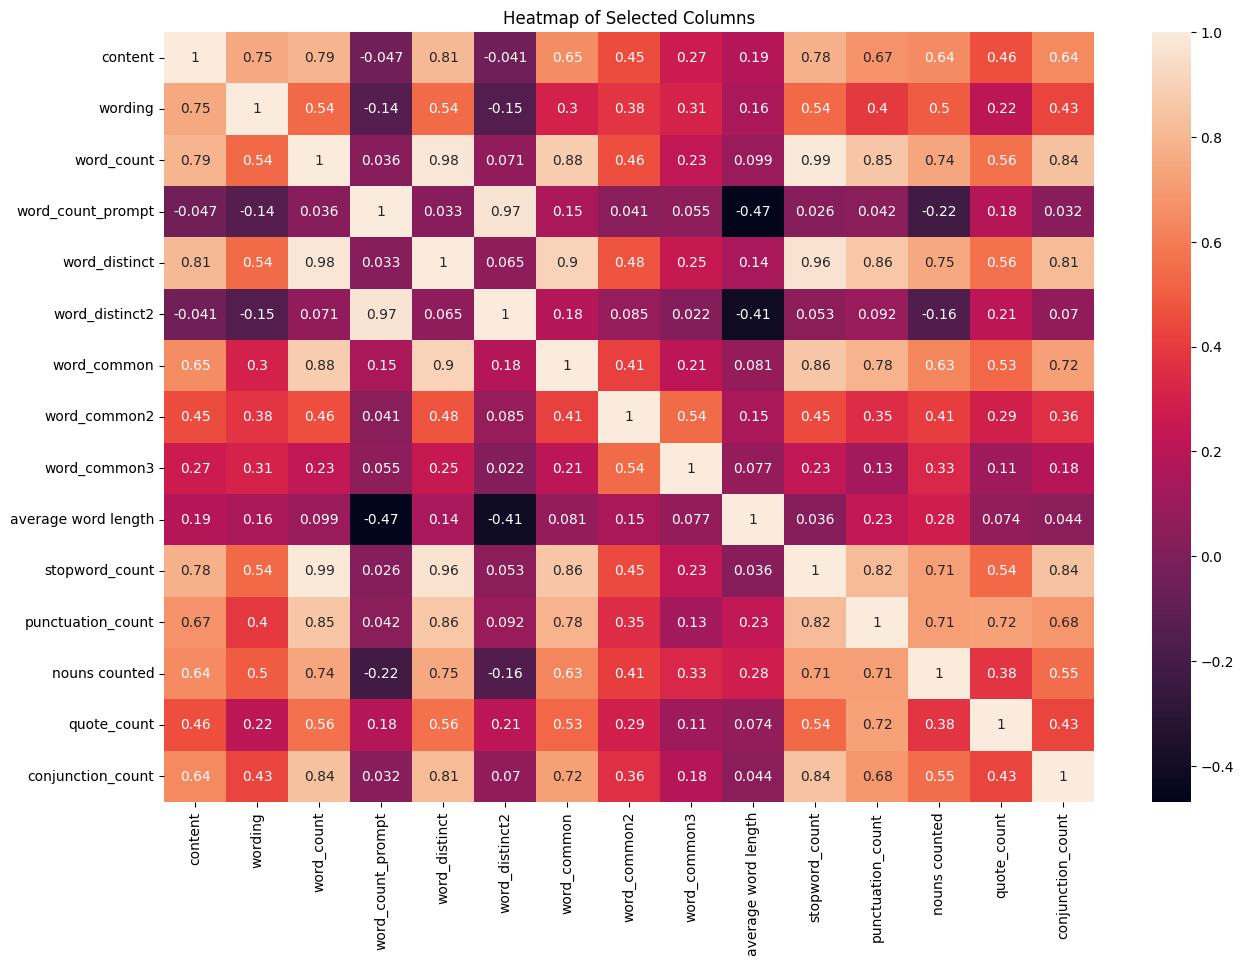

In [ ]:
#Here I have generated a heatmap for displaying the correlation strength between the features and for my understanding to select features
selected_columns = ['content', 'wording', 'word_count','word_count_prompt','word_distinct','word_distinct2','word_common','word_common2','word_common3','average word length','stopword_count','punctuation_count','nouns counted','quote_count','conjunction_count']
selected_data = merge_dtf[selected_columns]

correlation_ = selected_data.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(correlation_, annot=True, cmap='rocket')
plt.title('Heatmap of Selected Columns')
plt.show()

## **Section 3: Content and Wording (Q4, 10 points)**

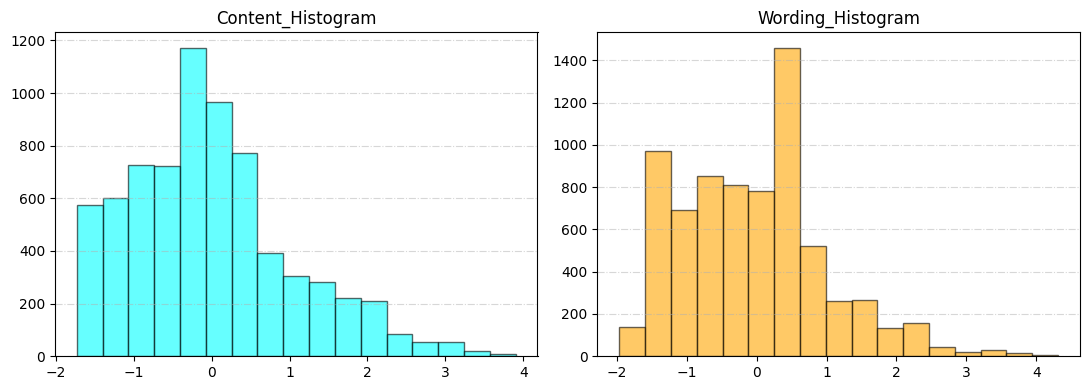

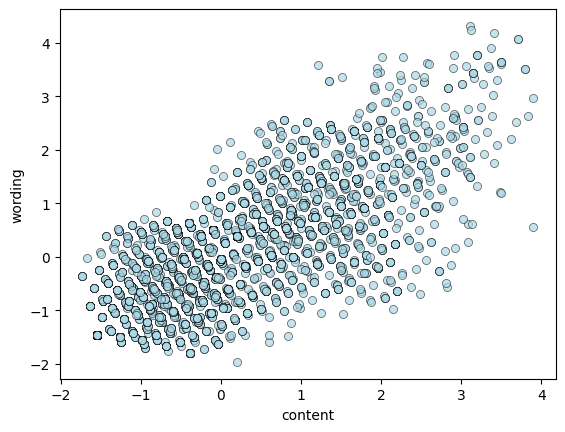

range for content:5.630185556899
range for wording:6.27330694515344
Correlation is:0.7513804859701969


In [ ]:
# Question-4: Look at the distributions of scores for content and wording, as histograms and scatterplots? What is the range of values here? How well correlated are they?   Do the shapes of these distributions differ for the different prompts?  (10 points)

#Plotting Histogram for content:

plt.figure(figsize=(11,4))

plt.subplot(1,2,1)
plt.hist(merge_dtf['content'],histtype='bar',alpha=0.6, bins=17, color='cyan',edgecolor='black')
plt.grid(axis='y', linestyle='dashdot', alpha=0.5)
plt.title('Content_Histogram')


#Plotting Histogram for wording:
plt.subplot(1,2,2)
plt.hist(merge_dtf['wording'],histtype='bar',alpha=0.6, bins=17, color='orange', edgecolor='black')
plt.grid(axis='y', linestyle='dashdot', alpha=0.5)
plt.title('Wording_Histogram')



plt.tight_layout()
plt.show()

#Plotting Scatterplot for content vs wording using the seaborn library
sns.scatterplot(data=merge_dtf,x='content', y='wording', c='lightblue', alpha=0.7,marker='o', s=34, edgecolor='black')
plt.show()


#Finding the value of Range for content:
value_min_content = merge_dtf['content'].min()
value_max_content = merge_dtf['content'].max()
range_content = value_max_content - value_min_content


#Finding the value of range for wording:
value_min_wording = merge_dtf['wording'].min()
value_max_wording = merge_dtf['wording'].max()
range_wording = value_max_wording - value_min_wording

#displaying both the values:
print(f"range for content:{range_content}")
print(f"range for wording:{range_wording}")

#Finding the value of Correlation between content and wording:
correlation = merge_dtf['content'].corr(merge_dtf['wording'])
print(f"Correlation is:{correlation}")






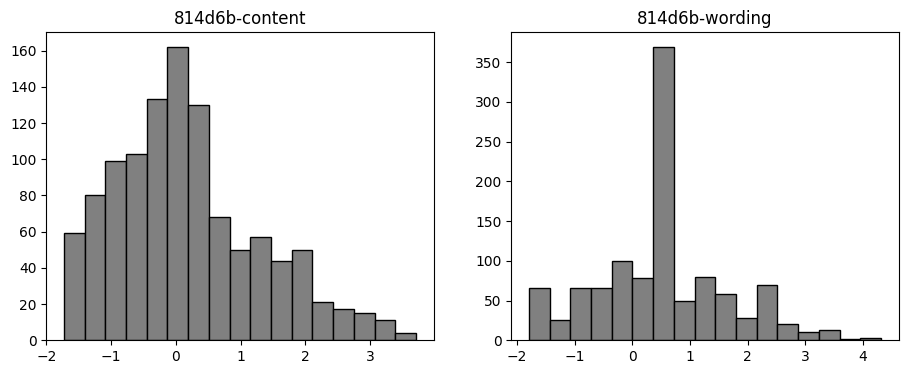

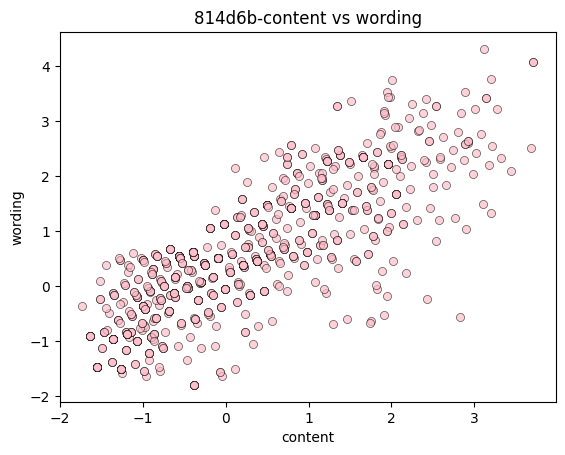

In [ ]:
#Plotting histograms and scatterplots for different prompts so as to see the difference in shapes of the plot
#histogram for prompt_id 814d6b
plt.figure(figsize=(11,4))
plt.subplot(1,2,1)
datarequired1 = merge_dtf[merge_dtf['prompt_id'] == '814d6b']['content']
plt.hist(datarequired1, bins= 17,color='gray', edgecolor='black')
plt.title(f'814d6b-content')

plt.subplot(1,2,2)
datarequired2 = merge_dtf[merge_dtf['prompt_id'] == '814d6b']['wording']
plt.hist(datarequired2, bins= 17,color='gray', edgecolor='black')
plt.title(f'814d6b-wording')

plt.tight_layout
plt.show()

#scatterplot for prompt_id 814d6b
datarequired3=merge_dtf[merge_dtf['prompt_id'] == '814d6b']
sns.scatterplot(data=datarequired3, x='content', y='wording',c='pink',alpha=0.7,s=34,edgecolor='black')
plt.title(f'814d6b-content vs wording')
plt.show()

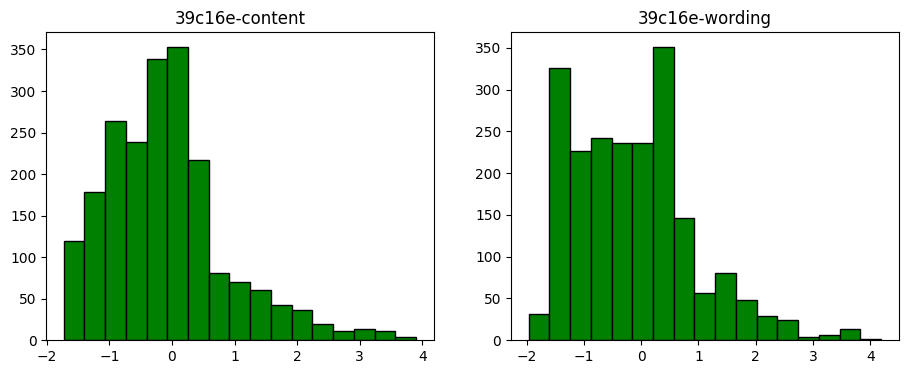

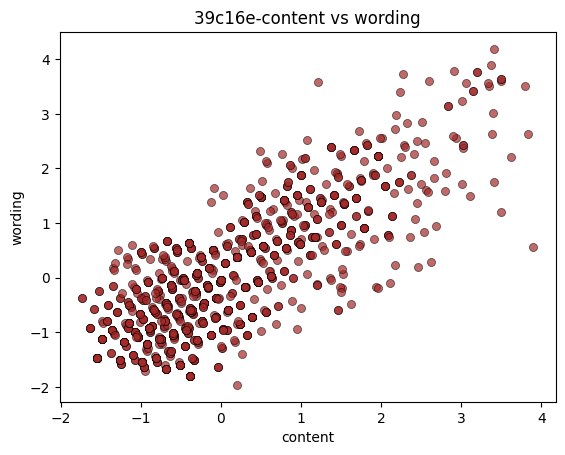

In [ ]:
#histogram for prompt_id 39c16e
plt.figure(figsize=(11,4))
plt.subplot(1,2,1)
datarequired4 = merge_dtf[merge_dtf['prompt_id'] == '39c16e']['content']
plt.hist(datarequired4, bins= 17,color='green', edgecolor='black')
plt.title(f'39c16e-content')

plt.subplot(1,2,2)
datarequired5 = merge_dtf[merge_dtf['prompt_id'] == '39c16e']['wording']
plt.hist(datarequired5, bins= 17,color='green', edgecolor='black')
plt.title(f'39c16e-wording')
plt.tight_layout
plt.show()

#scatterplot for prompt_id 39c16e
datarequired6=merge_dtf[merge_dtf['prompt_id'] == '39c16e']
sns.scatterplot(data=datarequired6, x='content', y='wording',c='brown',alpha=0.7,s=34,edgecolor='black')
plt.title(f'39c16e-content vs wording')
plt.show()

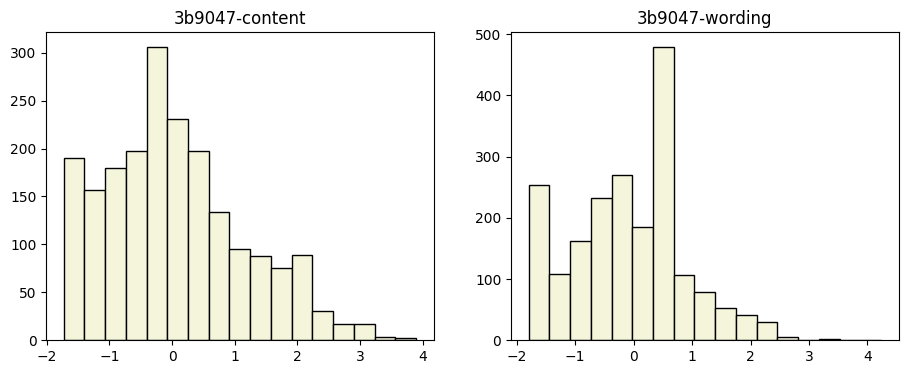

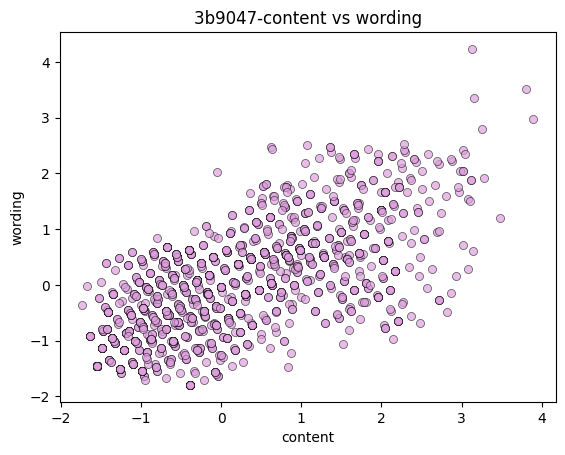

In [ ]:
#histogram for prompt_id 3b9047
plt.figure(figsize=(11,4))
plt.subplot(1,2,1)
datarequired7 = merge_dtf[merge_dtf['prompt_id'] == '3b9047']['content']
plt.hist(datarequired7, bins= 17,color='beige', edgecolor='black')
plt.title(f'3b9047-content')

plt.subplot(1,2,2)
datarequired8 = merge_dtf[merge_dtf['prompt_id'] == '3b9047']['wording']
plt.hist(datarequired8, bins= 17,color='beige', edgecolor='black')
plt.title(f'3b9047-wording')
plt.tight_layout
plt.show()

#scatterplot for prompt_id 3b9047
datarequired9=merge_dtf[merge_dtf['prompt_id'] == '3b9047']
sns.scatterplot(data=datarequired9, x='content', y='wording',c='plum',alpha=0.7,s=34,edgecolor='black')
plt.title(f'3b9047-content vs wording')
plt.show()

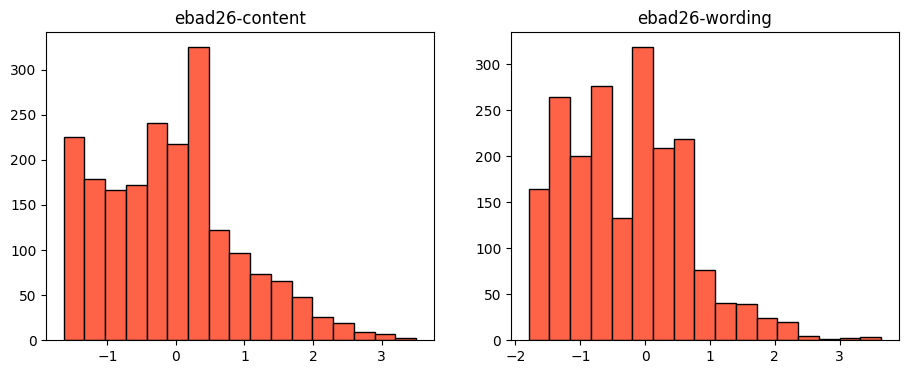

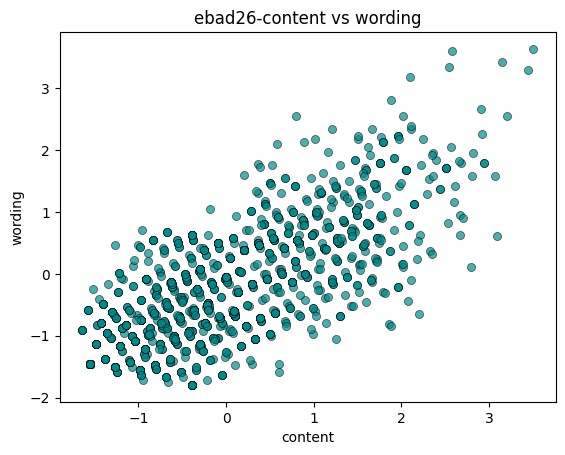

In [ ]:
#histogram for prompt_id ebad26
plt.figure(figsize=(11,4))
plt.subplot(1,2,1)
datarequired10 = merge_dtf[merge_dtf['prompt_id'] == 'ebad26']['content']
plt.hist(datarequired10, bins= 17,color='tomato', edgecolor='black')
plt.title(f'ebad26-content')

plt.subplot(1,2,2)
datarequired11 = merge_dtf[merge_dtf['prompt_id'] == 'ebad26']['wording']
plt.hist(datarequired11, bins= 17,color='tomato', edgecolor='black')
plt.title(f'ebad26-wording')
plt.tight_layout
plt.show()

#scatterplot for prompt_id ebad26
datarequired12=merge_dtf[merge_dtf['prompt_id'] == 'ebad26']
sns.scatterplot(data=datarequired12, x='content', y='wording',c='darkcyan',alpha=0.7,s=34,edgecolor='black')
plt.title(f'ebad26-content vs wording')
plt.show()

After plotting the graphs for all the prompts, we can see that the shapes of the scatterplots are almost same stating that they all show positive correlation.











 **Section 4: Words in Good and Bad Essays (Q5, 10 points)**

Question 5: Which words are over-represented in good essays (as per content and wording) while being under-represented in bad ones?     
Conversely, which words appear disproportionately in the bad essays?   What is an appropriate statistic to use here? (10 points)


First I have formed a new dataframe named new_dtf which consists of the original training data and then I preprocessed the contents of the texts inside it to use it ahead for model 1 and model 2 and to use it for question 5

In [ ]:
#merging the original dataframe df1 and df2 to create a new dataframe for preprocessing
new_dtf=pd.merge(dtf2,dtf1,on='prompt_id')
new_dtf.astype(dtypes)
new_dtf.head()

,student_id,prompt_id,text,content,wording,prompt_question,prompt_title,prompt_text
0,000e8c3c7ddb,814d6b,The third wave was an experimentto see how peo...,0.205683,0.380538,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave experiment took ...
1,0070c9e7af47,814d6b,The Third Wave developed rapidly because the ...,3.272894,3.219757,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave experiment took ...
2,0095993991fe,814d6b,The third wave only started as an experiment w...,0.205683,0.380538,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave experiment took ...
3,00c20c6ddd23,814d6b,The experimen was orginally about how even whe...,0.567975,0.969062,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave experiment took ...
4,00d40ad10dc9,814d6b,The third wave developed so quickly due to the...,-0.910596,-0.081769,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave experiment took ...


In [ ]:
# TEXT PRE-PROCESSING:
#Tokenizing the contents of the text for each relevant columns:

def tokenization(giventext):
    # Tokenize the input text
    tokens = word_tokenize(giventext)
    return tokens

new_dtf['text']=new_dtf['text'].apply(tokenization)
new_dtf['prompt_text']=new_dtf['prompt_text'].apply(tokenization)
new_dtf['prompt_question']=new_dtf['prompt_question'].apply(tokenization)
new_dtf['prompt_title']=new_dtf['prompt_title'].apply(tokenization)
new_dtf.head()



,student_id,prompt_id,text,content,wording,prompt_question,prompt_title,prompt_text
0,000e8c3c7ddb,814d6b,"[The, third, wave, was, an, experimentto, see,...",0.205683,0.380538,"[Summarize, how, the, Third, Wave, developed, ...","[The, Third, Wave]","[Background, The, Third, Wave, experiment, too..."
1,0070c9e7af47,814d6b,"[The, Third, Wave, developed, rapidly, because...",3.272894,3.219757,"[Summarize, how, the, Third, Wave, developed, ...","[The, Third, Wave]","[Background, The, Third, Wave, experiment, too..."
2,0095993991fe,814d6b,"[The, third, wave, only, started, as, an, expe...",0.205683,0.380538,"[Summarize, how, the, Third, Wave, developed, ...","[The, Third, Wave]","[Background, The, Third, Wave, experiment, too..."
3,00c20c6ddd23,814d6b,"[The, experimen, was, orginally, about, how, e...",0.567975,0.969062,"[Summarize, how, the, Third, Wave, developed, ...","[The, Third, Wave]","[Background, The, Third, Wave, experiment, too..."
4,00d40ad10dc9,814d6b,"[The, third, wave, developed, so, quickly, due...",-0.910596,-0.081769,"[Summarize, how, the, Third, Wave, developed, ...","[The, Third, Wave]","[Background, The, Third, Wave, experiment, too..."


In [ ]:
#removing the punctuation marks from the relevant columns:
def removepunctuation(ofgiventext):
    punctuation_chars = set(string.punctuation)
    cleaned_text = ''
    for char in ofgiventext:
        if char in punctuation_chars:
            cleaned_text += char

    return  cleaned_text
    new_dtf['text'] = new_dtf['text'].apply(removepunctuation)
    new_dtf['prompt_text'] = new_dtf['prompt_text'].apply(removepunctuation)
    new_dtf['prompt_question'] = new_dtf['prompt_question'].apply(removepunctuation)

In [ ]:
new_dtf.head()

,student_id,prompt_id,text,content,wording,prompt_question,prompt_title,prompt_text
0,000e8c3c7ddb,814d6b,"[The, third, wave, was, an, experimentto, see,...",0.205683,0.380538,"[Summarize, how, the, Third, Wave, developed, ...","[The, Third, Wave]","[Background, The, Third, Wave, experiment, too..."
1,0070c9e7af47,814d6b,"[The, Third, Wave, developed, rapidly, because...",3.272894,3.219757,"[Summarize, how, the, Third, Wave, developed, ...","[The, Third, Wave]","[Background, The, Third, Wave, experiment, too..."
2,0095993991fe,814d6b,"[The, third, wave, only, started, as, an, expe...",0.205683,0.380538,"[Summarize, how, the, Third, Wave, developed, ...","[The, Third, Wave]","[Background, The, Third, Wave, experiment, too..."
3,00c20c6ddd23,814d6b,"[The, experimen, was, orginally, about, how, e...",0.567975,0.969062,"[Summarize, how, the, Third, Wave, developed, ...","[The, Third, Wave]","[Background, The, Third, Wave, experiment, too..."
4,00d40ad10dc9,814d6b,"[The, third, wave, developed, so, quickly, due...",-0.910596,-0.081769,"[Summarize, how, the, Third, Wave, developed, ...","[The, Third, Wave]","[Background, The, Third, Wave, experiment, too..."


In [ ]:
#removal of digits from the relevant columns using regular expression:
columnswithoutdigits = ['text', 'prompt_question', 'prompt_text']
new_dtf[columnswithoutdigits] = new_dtf[columnswithoutdigits].replace(to_replace=r'\d', value='', regex=True)


In [ ]:
new_dtf.head()

,student_id,prompt_id,text,content,wording,prompt_question,prompt_title,prompt_text
0,000e8c3c7ddb,814d6b,"[The, third, wave, was, an, experimentto, see,...",0.205683,0.380538,"[Summarize, how, the, Third, Wave, developed, ...","[The, Third, Wave]","[Background, The, Third, Wave, experiment, too..."
1,0070c9e7af47,814d6b,"[The, Third, Wave, developed, rapidly, because...",3.272894,3.219757,"[Summarize, how, the, Third, Wave, developed, ...","[The, Third, Wave]","[Background, The, Third, Wave, experiment, too..."
2,0095993991fe,814d6b,"[The, third, wave, only, started, as, an, expe...",0.205683,0.380538,"[Summarize, how, the, Third, Wave, developed, ...","[The, Third, Wave]","[Background, The, Third, Wave, experiment, too..."
3,00c20c6ddd23,814d6b,"[The, experimen, was, orginally, about, how, e...",0.567975,0.969062,"[Summarize, how, the, Third, Wave, developed, ...","[The, Third, Wave]","[Background, The, Third, Wave, experiment, too..."
4,00d40ad10dc9,814d6b,"[The, third, wave, developed, so, quickly, due...",-0.910596,-0.081769,"[Summarize, how, the, Third, Wave, developed, ...","[The, Third, Wave]","[Background, The, Third, Wave, experiment, too..."


In [ ]:
#selecting the same features as earlier except the 'Number of quotes'  for the new dataframe new_dtf

new_dtf['word_count'] = new_dtf['text'].apply(lambda x: len(x))

new_dtf['word_count_prompt'] = new_dtf['prompt_text'].apply(lambda x: len(x))

new_dtf['word_distinct'] = new_dtf['text'].apply(lambda x: len(set(x)))

new_dtf['word_distinct2'] = new_dtf['prompt_text'].apply(lambda x: len(set(x)))


def commonwords(tokens1, tokens2):
    set1 = set(tokens1)
    set2 = set(tokens2)
    common_words = set1.intersection(set2)
    return len(common_words)
new_dtf['word_common'] = new_dtf.apply(lambda row: commonwords(row['text'], row['prompt_text']), axis=1)

new_dtf['word_common2'] = new_dtf.apply(lambda row: commonwords(row['text'], row['prompt_question']), axis=1)

new_dtf['word_common3'] = new_dtf.apply(lambda row: commonwords(row['text'], row['prompt_title']), axis=1)



wordlists = new_dtf['text']
sumlength = wordlists.apply(lambda wordlists: sum(len(word) for word in wordlists))
wordstotal = wordlists.apply(len)
avgwordlength = sumlength / wordstotal
new_dtf['average word length'] = avgwordlength

new_dtf['punctuation_count'] = new_dtf['text'].apply(calpunctuationcount)


def nouncounts(text):
    totwords = text
    countednouns = sum(1 for word in totwords if word[0].isupper())
    return countednouns
new_dtf['nouns counted'] = new_dtf['text'].apply(nouncounts)


def conjunctioncounts(text):
    conjunctionsgiven = ["and", "but", "or", "nor", "for", "yet", "so","since","if","although","because"]
    wordstotalled = text
    conjunct_count = sum(1 for word in wordstotalled if word in conjunctionsgiven)
    return conjunct_count
new_dtf['conjunction_count'] = new_dtf['text'].apply(conjunctioncounts)


def countallstopwords(tokens):
    stopwordsss = set(stopwords.words('english'))
    stopwordcounted = sum(1 for token in tokens if token in stopwordsss)
    return stopwordcounted
new_dtf['stopword__count'] = new_dtf['text'].apply(countallstopwords)

new_dtf.head()


,student_id,prompt_id,text,content,wording,prompt_question,prompt_title,prompt_text,word_count,word_count_prompt,word_distinct,word_distinct2,word_common,word_common2,word_common3,average word length,punctuation_count,nouns counted,conjunction_count,stopword__count
0,000e8c3c7ddb,814d6b,"[The, third, wave, was, an, experimentto, see,...",0.205683,0.380538,"[Summarize, how, the, Third, Wave, developed, ...","[The, Third, Wave]","[Background, The, Third, Wave, experiment, too...",64,660,52,287,24,6,1,4.468750,3,4,1,21
1,0070c9e7af47,814d6b,"[The, Third, Wave, developed, rapidly, because...",3.272894,3.219757,"[Summarize, how, the, Third, Wave, developed, ...","[The, Third, Wave]","[Background, The, Third, Wave, experiment, too...",232,660,137,287,53,11,3,4.431034,19,28,11,81
2,0095993991fe,814d6b,"[The, third, wave, only, started, as, an, expe...",0.205683,0.380538,"[Summarize, how, the, Third, Wave, developed, ...","[The, Third, Wave]","[Background, The, Third, Wave, experiment, too...",67,660,53,287,30,6,1,4.298507,3,7,4,25
3,00c20c6ddd23,814d6b,"[The, experimen, was, orginally, about, how, e...",0.567975,0.969062,"[Summarize, how, the, Third, Wave, developed, ...","[The, Third, Wave]","[Background, The, Third, Wave, experiment, too...",86,660,60,287,43,9,2,4.395349,8,6,2,35
4,00d40ad10dc9,814d6b,"[The, third, wave, developed, so, quickly, due...",-0.910596,-0.081769,"[Summarize, how, the, Third, Wave, developed, ...","[The, Third, Wave]","[Background, The, Third, Wave, experiment, too...",29,660,26,287,16,7,1,4.103448,2,2,2,10


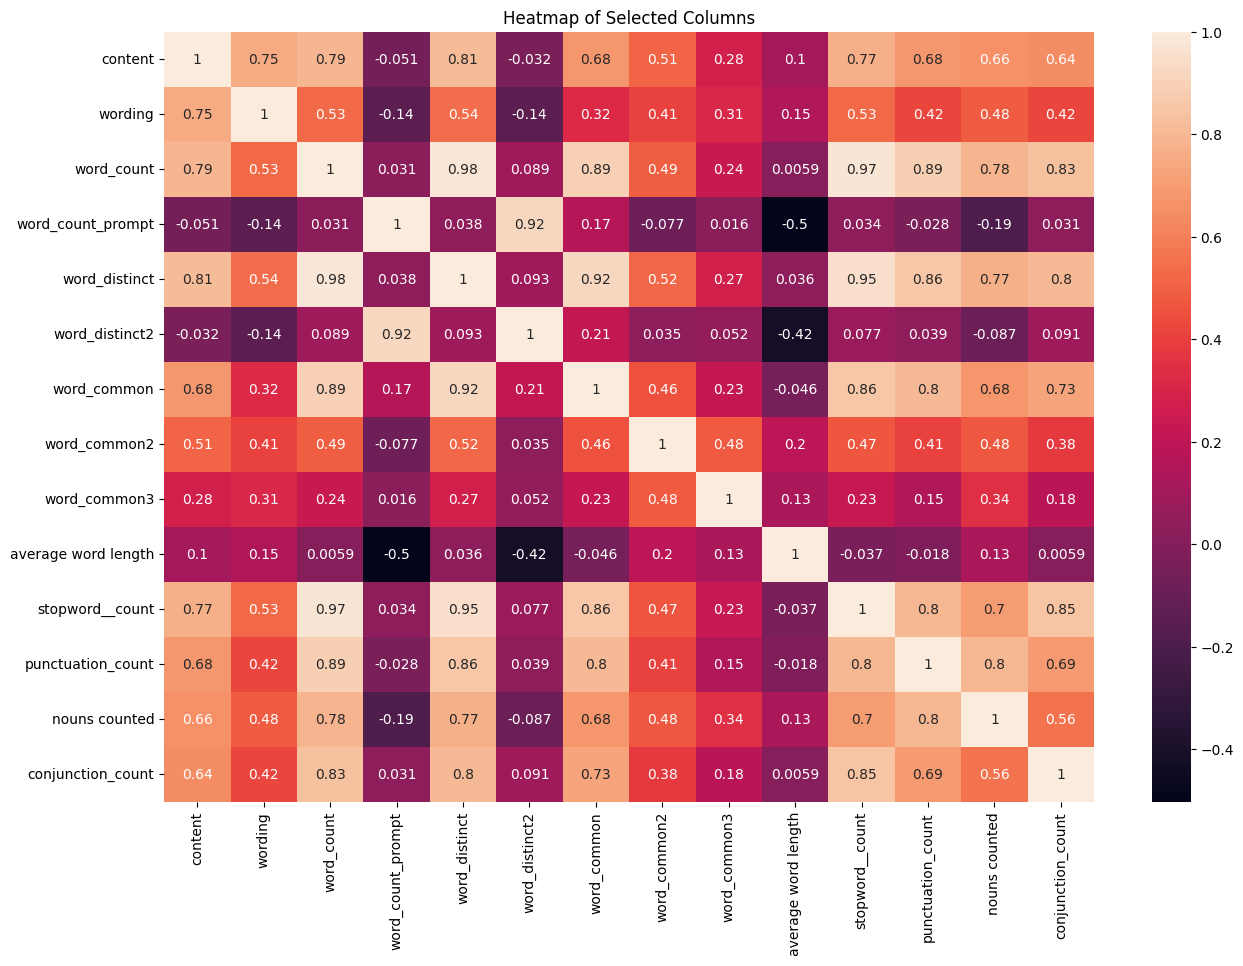

In [ ]:
#This heatmap describes the correlation between the features of the preprocessed datafram- new_dtf:
selected_columns = ['content', 'wording', 'word_count','word_count_prompt','word_distinct','word_distinct2','word_common','word_common2','word_common3','average word length','stopword__count','punctuation_count','nouns counted','conjunction_count']
selected_data = new_dtf[selected_columns]

correlation_ = selected_data.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(correlation_, annot=True, cmap='rocket')
plt.title('Heatmap of Selected Columns')
plt.show()

In [ ]:
#Question 5: Which words are over-represented in good essays (as per content and wording) while being under-represented in bad ones?  Conversely, which words appear disproportionately in the bad essays?   What is an appropriate statistic to use here? (10 points)
from sklearn.feature_extraction.text import TfidfVectorizer
#first we join the tokenized text into a single string which is separated by ' '
new_dtf['text'] = new_dtf['text'].apply(lambda tokens: ' '.join(tokens))
tfivector = TfidfVectorizer(stop_words='english')
tfimatrix = tfivector.fit_transform(new_dtf['text'])
tfidf = pd.DataFrame(tfimatrix.toarray(), columns=tfivector.get_feature_names_out())


# Calculating the median scores for 'wording' and 'content'
medianwording = new_dtf['wording'].median()
mediancontent = new_dtf['content'].median()

# Filtering essays into good and bad based on median scores
goodessays = tfidf[(new_dtf['content'] > mediancontent) & (new_dtf['wording'] > medianwording)]
badessays = tfidf[(new_dtf['content'] < mediancontent) & (new_dtf['wording'] < medianwording)]

# Calculating the mean scores for good and bad essays
meangoodessays = goodessays.mean()
meanbadessays = badessays.mean()

scoredifference = meangoodessays - meanbadessays
wordsorting = scoredifference.sort_values(ascending=False)

# Selecting the top 30 over-represented and under-represented words
overrepresentedwords = wordsorting.head(30)
underrepresentedwords = wordsorting.tail(30)

print("\nOver-represented Words in Good Essays which are under-represented Words in Bad Essays:")
print(overrepresentedwords)

print("\nunder-represented Words in Good Essays which are over-represented Words in Bad Essays:")
print(underrepresentedwords)



Over-represented Words in Good Essays which are under-represented Words in Bad Essays:
students      0.028410
jones         0.017579
experiment    0.017503
element       0.014699
class         0.014620
nobles        0.014552
people        0.014105
farmers       0.014046
slaves        0.012393
gods          0.011871
wave          0.011271
states        0.010430
paragraph     0.010336
priests       0.010114
aristotle     0.009783
government    0.009327
way           0.009295
movement      0.009177
control       0.008901
audience      0.008708
text          0.007970
soldiers      0.007899
tragedy       0.007788
pyramid       0.007679
character     0.007418
things        0.007365
rules         0.007135
project       0.007113
taxes         0.007084
sinclair      0.007077
dtype: float64

under-represented Words in Good Essays which are over-represented Words in Bad Essays:
counters     -0.002526
mark         -0.002531
presented    -0.002778
free         -0.002898
prosperity   -0.002922
eate

## **Section 5: Three Interesting Plots (Q6, 15 points)**

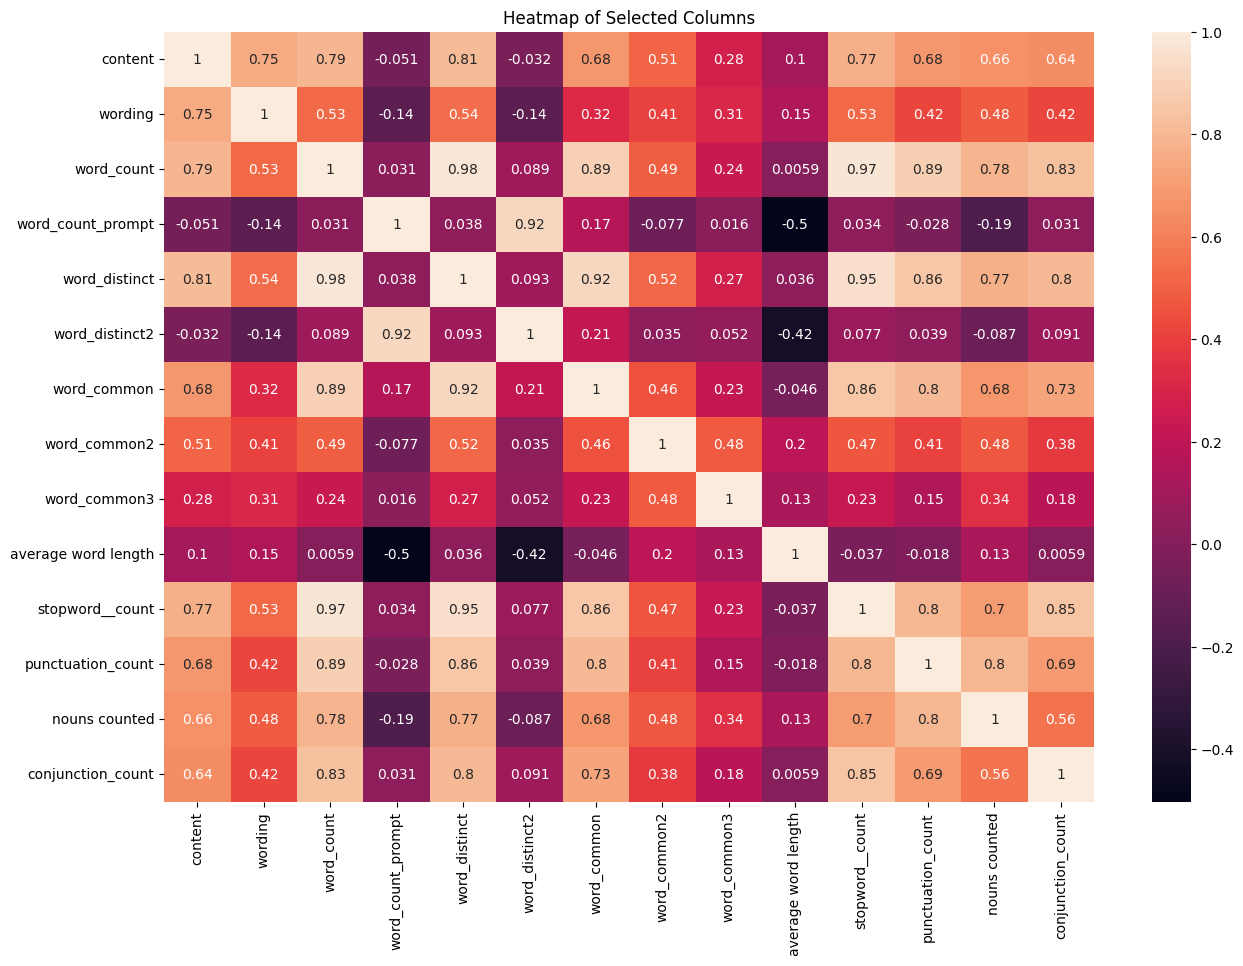

In [ ]:
#Question-6:Create three plots of your own using the dataset that you think reveal something very interesting. Explain what it is, and anything else you learned from your exploration. (15 points)

#1st plot: Heatmap of Correlation between all the features and columns of new dataframe - new_dtf

selected_columns = ['content', 'wording', 'word_count','word_count_prompt','word_distinct','word_distinct2','word_common','word_common2','word_common3','average word length','stopword__count','punctuation_count','nouns counted','conjunction_count']
selected_data = new_dtf[selected_columns]

correlation_ = selected_data.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(correlation_, annot=True, cmap='rocket')
plt.title('Heatmap of Selected Columns')
plt.show()

This heatmap shows the correlation between all the columns of the dataframe, we can use this for determining which columns are strongly co-related and which are not. It helps us in feature selection.

Text(0.5, 1.0, 'average word length histogram')

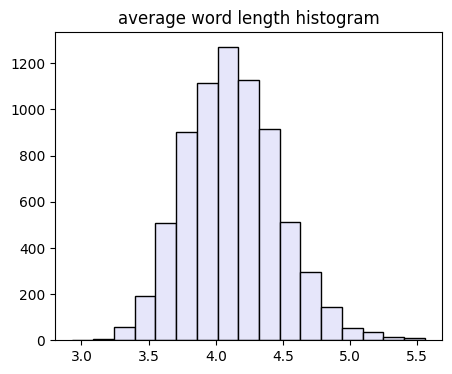

In [ ]:
#2nd plot: histogram for average word length
plt.figure(figsize=(11,4))
plt.subplot(1,2,1)
datarequiredx = new_dtf['average word length']
plt.hist(datarequiredx, bins= 17,color='lavender', edgecolor='black')
plt.title(f'average word length histogram')

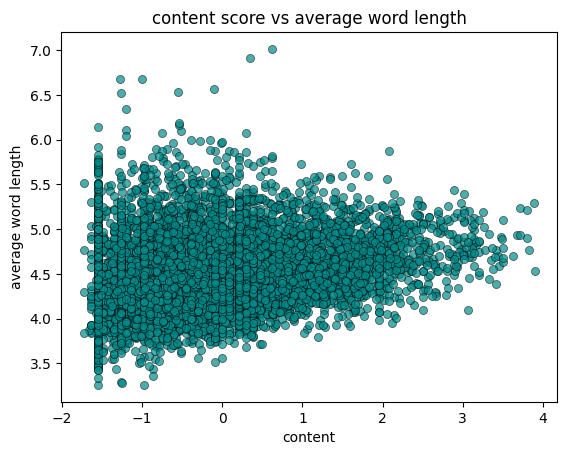

In [ ]:
#scatterplot between content score and average word length in text
datarequiredxx=merge_dtf
sns.scatterplot(data=datarequiredxx, y='average word length', x='content',c='darkcyan',alpha=0.7,s=34,edgecolor='black')
plt.title(f'content score vs average word length')
plt.show()


## **Section 6: Baseline Model (Q7, 10 points)**

Question-7: Now build a baseline model for this task. We will call this Model 0. You will train linear regression models for both content and wording on 80% of the training data and test it on the remaining 20% chosen at random.  Use only the original five features described above.  Report the mean squared error of each model. What do you make of the error rate? (10 points)

In [ ]:
# Question-7: Now build a baseline model for this task. We will call this Model 0. You will train linear regression models for both content and wording on 80% of the training data and test it on the remaining 20% chosen at random.  Use only the original five features described above.  Report the mean squared error of each model. What do you make of the error rate? (10 points)
#execution of baseline model0
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error



#Features(A) and Target Variables(b)
A = merge_dtf[['word_count', 'word_count_prompt', 'word_distinct', 'word_distinct2', 'word_common']]
b_content = merge_dtf['content']
b_wording = merge_dtf['wording']

# training data-80% testing data-20%
A_train, A_test, b_content_train, b_content_test, b_wording_train, b_wording_test = train_test_split(
    A, b_content, b_wording, test_size=0.2, random_state=42)

#linear regression models for content and wording
contentmodel = LinearRegression()
contentmodel.fit(A_train, b_content_train)

wordingmodel = LinearRegression()
wordingmodel.fit(A_train, b_wording_train)

#evaluating the models
contentprediction = contentmodel.predict(A_test)
wordingprediction = wordingmodel.predict(A_test)

#mean squared error
contentmse = mean_squared_error(b_content_test, contentprediction)
wordingmse = mean_squared_error(b_wording_test, wordingprediction)

print(f'Mean Squared Error (Content): {contentmse}')
print(f'Mean Squared Error (Wording): {wordingmse}')

Mean Squared Error (Content): 0.3156339773005778
Mean Squared Error (Wording): 0.508718474408857


 interpretation from the mean squared error rates:- \The mean square error should be less in order for the model to perform efficiently

## **Section 7: Feature Cleaning and Additional Models (Q8 & Q9, 20 points total)**

Question-8: The basic features as defined above are not really suited for the task.  Features can be preprocessed (or cleaned) to improve them before feeding into the model (e.g. normalize them, do a special treatment of missing values, etc). This can significantly improve the performance of your model. Do preprocessing for all the features (the original five plus the extra you add). Explain what you did. (10 points)

In [ ]:
#1st-I found out if there are any missing values
new_dtf.isna().any()

student_id             False
prompt_id              False
text                   False
content                False
wording                False
prompt_question        False
prompt_title           False
prompt_text            False
word_count             False
word_count_prompt      False
word_distinct          False
word_distinct2         False
word_common            False
word_common2           False
word_common3           False
average word length    False
punctuation_count      False
nouns counted          False
conjunction_count      False
stopword__count        False
dtype: bool

In [ ]:
#2nd- numeric features are scaled using the MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

scalingcolumns = ['word_count', 'word_count_prompt', 'word_distinct', 'word_distinct2', 'word_common', 'word_common2', 'word_common3', 'average word length', 'stopword__count', 'punctuation_count', 'nouns counted', 'conjunction_count']
scaler = MinMaxScaler()
scaler.fit(new_dtf[scalingcolumns])
new_dtf[scalingcolumns] = scaler.transform(new_dtf[scalingcolumns])
new_dtf.head()


,student_id,prompt_id,text,content,wording,prompt_question,prompt_title,prompt_text,word_count,word_count_prompt,word_distinct,word_distinct2,word_common,word_common2,word_common3,average word length,punctuation_count,nouns counted,conjunction_count,stopword__count
0,000e8c3c7ddb,814d6b,The third wave was an experimentto see how peo...,0.205683,0.380538,"[Summarize, how, the, Third, Wave, developed, ...","[The, Third, Wave]","[Background, The, Third, Wave, experiment, too...",0.053206,0.077605,0.129693,0.076923,0.079070,0.315789,0.25,0.585540,0.028302,0.045455,0.020833,0.069307
1,0070c9e7af47,814d6b,The Third Wave developed rapidly because the s...,3.272894,3.219757,"[Summarize, how, the, Third, Wave, developed, ...","[The, Third, Wave]","[Background, The, Third, Wave, experiment, too...",0.282401,0.077605,0.419795,0.076923,0.213953,0.578947,0.75,0.571157,0.179245,0.318182,0.229167,0.267327
2,0095993991fe,814d6b,The third wave only started as an experiment w...,0.205683,0.380538,"[Summarize, how, the, Third, Wave, developed, ...","[The, Third, Wave]","[Background, The, Third, Wave, experiment, too...",0.057299,0.077605,0.133106,0.076923,0.106977,0.315789,0.25,0.520617,0.028302,0.079545,0.083333,0.082508
3,00c20c6ddd23,814d6b,The experimen was orginally about how even whe...,0.567975,0.969062,"[Summarize, how, the, Third, Wave, developed, ...","[The, Third, Wave]","[Background, The, Third, Wave, experiment, too...",0.083220,0.077605,0.156997,0.076923,0.167442,0.473684,0.50,0.557548,0.075472,0.068182,0.041667,0.115512
4,00d40ad10dc9,814d6b,The third wave developed so quickly due to the...,-0.910596,-0.081769,"[Summarize, how, the, Third, Wave, developed, ...","[The, Third, Wave]","[Background, The, Third, Wave, experiment, too...",0.005457,0.077605,0.040956,0.076923,0.041860,0.368421,0.25,0.446230,0.018868,0.022727,0.041667,0.033003


Question-9: For each of the two tasks (content and wording) create two models:
Model 1 should use the cleaned features and linear regression for training.  You can do some (potentially non-linear) scaling to keep the scores in range.
Model 2 should use the cleaned features and an algorithm other than logistic regression (e.g. Random Forest, Nearest Neighbor, etc) for training.
         Compare their performance and explain your reasoning for the differences in their performances. (10 points)


In [ ]:
#Training the model 1 using scaled features by linear regression
#model 1:
B = new_dtf[['word_count','word_count_prompt','word_distinct','word_distinct2','word_common','word_common2','word_common3','average word length','stopword__count','punctuation_count','nouns counted','conjunction_count']]
a_content = new_dtf['content']
a_wording = new_dtf['wording']

# training data-80% testing data-20%
B_train, B_test, a_content_train, a_content_test, a_wording_train, a_wording_test = train_test_split(
    B, a_content, a_wording, test_size=0.2, random_state=23)

#linear regression models for content and wording
contentmodel = LinearRegression()
contentmodel.fit(B_train, a_content_train)

wordingmodel = LinearRegression()
wordingmodel.fit(B_train, a_wording_train)

#evaluating the models
contentprediction = contentmodel.predict(B_test)
wordingprediction = wordingmodel.predict(B_test)

#mean squared error
contentmse1 = mean_squared_error(a_content_test, contentprediction)
wordingmse1 = mean_squared_error(a_wording_test, wordingprediction)

print(f'Mean Squared Error (Content): {contentmse1}')
print(f'Mean Squared Error (Wording): {wordingmse1}')

Mean Squared Error (Content): 0.31792688953547943
Mean Squared Error (Wording): 0.4895311947280585


In [ ]:
#Training the model 2 using scaled features by Random Forest method
#model 2:
from sklearn.ensemble import RandomForestRegressor
# creating a random forest regressor for content
content_model = RandomForestRegressor(random_state=23)
content_model.fit(B_train, a_content_train)

# creating a random forest regressor for wording
wording_model = RandomForestRegressor(random_state=42)
wording_model.fit(B_train, a_wording_train)

# Evaluating the models
predictingcontent = content_model.predict(B_test)
predicitingwording = wording_model.predict(B_test)

# mean squared error for content and wording
contentinmse = mean_squared_error(a_content_test, predictingcontent)
wordinginmse = mean_squared_error(a_wording_test, predicitingwording)

print(f'Mean Squared Error (Content): {contentinmse}')
print(f'Mean Squared Error (Wording): {wordinginmse}')

Mean Squared Error (Content): 0.20260815525604248
Mean Squared Error (Wording): 0.36764316151121157


In [ ]:
model_comparision = {
    'Model': ['Model 0', 'Model 1', 'Model 2'],
    'Content MSE': [contentmse, contentmse1, contentinmse],
    'Wording MSE': [wordingmse, wordingmse1, wordinginmse],
}
compare_dtf = pd.DataFrame(model_comparision)
compare_dtf.set_index('Model', inplace=True)
print(compare_dtf)
compare_dtf.head()


         Content MSE  Wording MSE
Model                            
Model 0     0.315634     0.508718
Model 1     0.317927     0.489531
Model 2     0.202608     0.367643


,Content MSE,Wording MSE
Model,,
Model 0,0.315634,0.508718
Model 1,0.317927,0.489531
Model 2,0.202608,0.367643


The mean squared rate of content in model 0 and model 1 is almost similar but due to feature scaling and preprocessing, the mean squared rate of wording in them has reduced by some extent. Whereas in Model 2 using random forest due to its non-linearity models the complex relationships in data which reduces the mean squared error rate for both wording and content significantly.

## **Section 8: Kaggle Submission Screenshots (Q10, 5 points)**

Public Score:

Private Score:

Kaggle profile link:

Screenshot(s):